The Shape of image A is:  (1024, 768, 3)


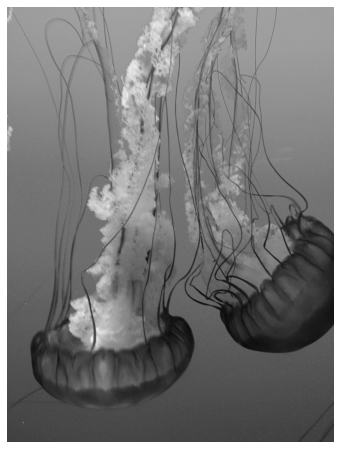

In [111]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})

#Read the image as a matrix
A = imread(os.path.join('..','DATA','jelly.jpg'))

print("The Shape of image A is: ", A.shape)

#The axis=2 argument tells numpy.mean() to average values across all three color channels.
#Convert RGB to grayscale 
MeanOfA = np.mean(A,2); 

plt.imshow(MeanOfA,cmap='gray')
plt.axis('off')
plt.show()

The shape of Image A after computing DFT is  (1024, 768)


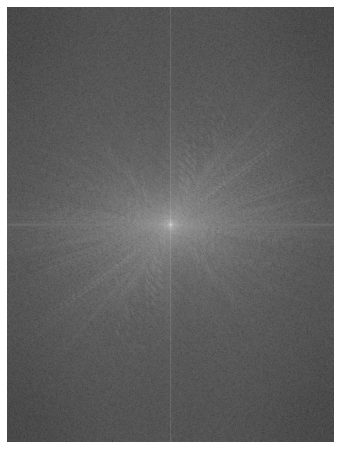

In [108]:
#fft2 computes the dft using fft  
#Data is periodic from 0 to 2pi
MeanOfA_computedDFT = np.fft.fft2(MeanOfA)
print("The shape of Image A after computing DFT is ", MeanOfA_computedDFT.shape)
#plt.imshow(At, cmap = 'Reds')

#making our data pretty
# fftshift function centers our complex data from DFT
#swaps data from fft() right down the middle
# no data is centered from -pi/2 to pi/2
F = np.log(np.abs(np.fft.fftshift(At))+1) # Put FFT on log scale


plt.imshow(F,cmap='gray')
plt.axis('off')
plt.show()

The Length of the Image A after reshaping is:  786432
The size of Image A after zeroing low F-coefficients is:  (1024, 768)
The size of Image A after multiplying two matrixes(MeanOfA_computedDFT * KeepIndices) is:  (1024, 768)


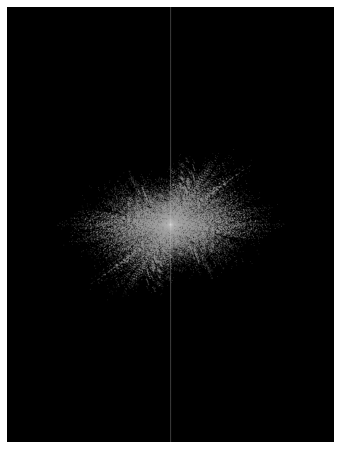

In [109]:
## Zero out all small coefficients and inverse transform
DiscardSmallCoeffMatrix= np.sort(np.abs(np.reshape(MeanOfA_computedDFT,-1))) #gives me 1D array 
print("The Length of the Image A after reshaping is: ", len(DiscardSmallCoeffMatrix))

#Keep 5% of the Fourier Coeffieients
keep = 0.050

                                     #floor(5.3) = 5
thresh = DiscardSmallCoeffMatrix[int(np.floor((1-keep)*len(DiscardSmallCoeffMatrix)))] #the length is 786432

#Keep those indices in the matrix that are above the threshold
KeepIndices = np.abs(MeanOfA_computedDFT) > thresh
print("The size of Image A after zeroing low F-coefficients is: ", KeepIndices.shape)


AfterThresholdingFFT = MeanOfA_computedDFT * KeepIndices
print("The size of Image A after multiplying two matrixes(MeanOfA_computedDFT * KeepIndices) is: ", Atlow.shape)

#making our data pretty and swaping it to the center
Flow = np.log(np.abs(np.fft.fftshift(AfterThresholdingFFT))+1) # Put FFT on log scale

plt.imshow(Flow,cmap='gray')
plt.axis('off')
plt.show()

/Users/sarahsyed/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


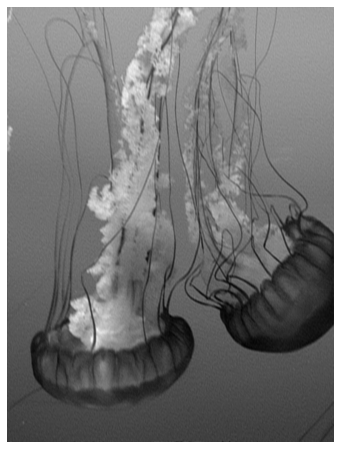

In [110]:
## Plot Reconstruction
AfterThresholdingInverseFFT = np.fft.ifft2(AfterThresholdingFFT).astype('uint8')

plt.imshow(AfterThresholdingInverseFFT,cmap='gray')
plt.axis('off')
plt.show()

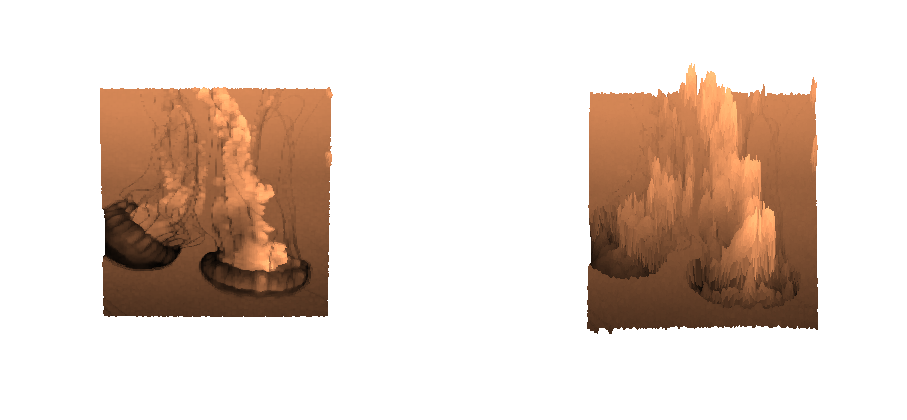

In [112]:
plt.rcParams['figure.figsize'] = [16, 8]

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

Anew = MeanOfA[::5,::5]

y = np.arange(Anew.shape[0])
x = np.arange(Anew.shape[1])

X,Y = np.meshgrid(x,y)

surf1 = ax1.plot_surface(X,Y,Anew, rstride=1, cstride=1,cmap='copper',linewidth=1, antialiased=False)
surf2 = ax2.plot_surface(X,Y,Anew, rstride=1, cstride=1,cmap='copper',linewidth=1, antialiased=False)

ax1.view_init(90, 90) 
ax1.axis('off')


#rotating the 3D image
ax2.view_init(60, 90) 
ax2.axis('off')

plt.show()